# 预测正样本的主题分级

## 提取预测结果中的正样本

In [2]:
# -*- coding: utf-8 -*-
# 删除负样本
import csv
import os
file_old = 'D:/NLP-master/runs/1592381154/prediction2.csv'
file_temp = 'D:/NLP-master/fenji/pre_true.csv'
with open(file_old, 'r', newline='', encoding='gb18030') as f_old, \
    open(file_temp, 'w', newline='', encoding='gb18030') as f_temp:
    f_csv_old = csv.reader(f_old)
    f_csv_temp = csv.writer(f_temp)
    for rows in f_csv_old:
        if rows[0] != '[其他]' and rows[1] !='':                  # 删除负样本和文本为空的样本
            f_csv_temp.writerow(rows)
print('done')

done


In [3]:
#展示正样本
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
pre_true = pd.read_csv(os.path.join(file_temp), encoding = "gb18030", header=None)
pre_true

,0,1
0,[美国实体清单],华为 针对 临时 通用 许可证 发布 声明 华为 回应 美国 延长 实体 清单 无聊 看待 ...
1,[美国实体清单],美国众议院 已经 决议 年 之内 实体 清单 撤销 华为 近期 频频 接受 外媒 采访 华为...
2,[美国实体清单],针对 美国 实体 清单 任正非 充满信心 地说 美国 实体 清单 伤害 美国公司 美国政府 ...
3,[美国实体清单],汇桔云 全新 改版 上线 列入 黑名单 华为 危机 中兴 小 华为 核心技术 更好 列入 黑...
4,[美国实体清单],月 日 英国 天空 新闻台 播出 华为 创始人 兼 任正非 专访 任正非 谈及 英国 新 首...
...,...,...
1256,[美国实体清单],岁 任正非 最新 发声 华为 已 做好 实体 清单 长期 撤销 准备 却 担忧 近日 华为 ...
1257,[美国实体清单],华为公司 致信 员工 多年 前 已 预计 美国 打压 困难 挡不住 前进 步伐 环球网 环球...
1258,[美国实体清单],华为 笔记本电脑 现在 回到 美国 微软 在线 商店 微软 重新 上架 华为 笔记本电脑 令...
1259,[美国实体清单],任正非 已 准备 退休 美国 打压 产生 动力 任正非 本月 日 接受 拉美 西班牙 媒体 ...


In [4]:
#取所需列，只需要文本列
pt_data = pre_true[[1]]
pt_data

,1
0,华为 针对 临时 通用 许可证 发布 声明 华为 回应 美国 延长 实体 清单 无聊 看待 ...
1,美国众议院 已经 决议 年 之内 实体 清单 撤销 华为 近期 频频 接受 外媒 采访 华为...
2,针对 美国 实体 清单 任正非 充满信心 地说 美国 实体 清单 伤害 美国公司 美国政府 ...
3,汇桔云 全新 改版 上线 列入 黑名单 华为 危机 中兴 小 华为 核心技术 更好 列入 黑...
4,月 日 英国 天空 新闻台 播出 华为 创始人 兼 任正非 专访 任正非 谈及 英国 新 首...
...,...
1256,岁 任正非 最新 发声 华为 已 做好 实体 清单 长期 撤销 准备 却 担忧 近日 华为 ...
1257,华为公司 致信 员工 多年 前 已 预计 美国 打压 困难 挡不住 前进 步伐 环球网 环球...
1258,华为 笔记本电脑 现在 回到 美国 微软 在线 商店 微软 重新 上架 华为 笔记本电脑 令...
1259,任正非 已 准备 退休 美国 打压 产生 动力 任正非 本月 日 接受 拉美 西班牙 媒体 ...


### 保存为txt文件

In [13]:
content = pt_data[1].tolist()
#保存成txt
def text_save(filename, data):#filename为写入txt文件的路径，data为要写入数据列表.
    file = open(filename,'a', encoding='utf-8')
    for i in range(len(data)):
        s = str(data[i]).replace('[','').replace(']','')#去除[],这两行按数据不同，可以选择
        s = s.replace("'",'').replace(',','') +'\n'   #去除单引号，逗号，每行末尾追加换行符
        file.write(s)
    file.close()
    print("保存文件成功") 
text_save('D:/NLP-master/fenji/true_data'+str(len(content))+'.txt', content)

保存文件成功


## 内容关于华为被加入美国实体清单的微博

In [14]:
#含“华为”、“任正非”字样的微博
pt_data = pt_data.astype(str)#将所有元素转换为str
list0 = pt_data[pt_data[1].str.contains('华为|任正非')]
list0

,1
0,华为 针对 临时 通用 许可证 发布 声明 华为 回应 美国 延长 实体 清单 无聊 看待 ...
1,美国众议院 已经 决议 年 之内 实体 清单 撤销 华为 近期 频频 接受 外媒 采访 华为...
2,针对 美国 实体 清单 任正非 充满信心 地说 美国 实体 清单 伤害 美国公司 美国政府 ...
3,汇桔云 全新 改版 上线 列入 黑名单 华为 危机 中兴 小 华为 核心技术 更好 列入 黑...
4,月 日 英国 天空 新闻台 播出 华为 创始人 兼 任正非 专访 任正非 谈及 英国 新 首...
...,...
1256,岁 任正非 最新 发声 华为 已 做好 实体 清单 长期 撤销 准备 却 担忧 近日 华为 ...
1257,华为公司 致信 员工 多年 前 已 预计 美国 打压 困难 挡不住 前进 步伐 环球网 环球...
1258,华为 笔记本电脑 现在 回到 美国 微软 在线 商店 微软 重新 上架 华为 笔记本电脑 令...
1259,任正非 已 准备 退休 美国 打压 产生 动力 任正非 本月 日 接受 拉美 西班牙 媒体 ...


## 内容关于其他中国企业（非华为）被加入美国实体清单的微博

In [17]:
#含“加入”、“列入”、“纳入”字样，不含“华为”、“任正非”字样的微博
re1 = list(list0[1])
re2 = list(pt_data[1])
rest = list(set(re2) ^ set(re1))
result = pt_data[pt_data[1].isin(rest)]
result = result.astype(str)
list1 = result[result[1].str.contains(
    '加入|列入|纳入|新增|再添|添加|再有')]
list1

,1
6,国家 反恐 办 强烈 谴责 美国 视频 国家 反恐 办 强烈 谴责 美将 新疆 公安机关 机...
9,美国商务部 号 表示 将家 中国 企业 列入 美国 贸易 管制 黑名单 禁止 美国 企业 合...
12,美国商务部 周五 月 日 表示 当局 几所 中企 国有 研究所 加入 国安 禁购 实体 清单...
14,截止 当前 媒体 热度 个股 排行榜 中科 曙光 复牌 一字 跌停 公司 持续 列入 美国 ...
19,发布 头条 文章 美国 拉 黑官 宣 破冰 计划 出炉 实体 清单 新增 家 中国 科技 公...
...,...
1242,海康 威视 回应 遭 列入 实体 清单 长期 影响 有限 针对 美国商务部 公司 列入 实体...
1244,海康 威视 回应 美国 禁令 美国 芯片 依赖度 不高 昨天 凌晨 消息 称 中国 企业 海...
1248,月 日 美国商务部 发布公告 宣布 中国 实体 纳入 出口 管制 实体 清单 有家 中国 企...
1250,美国 实体 清单 新增 五家 公司 名单 曝光 海康 大华 列 导语 美国 试图 扩大 贸易...


## 其他与美国实体清单相关的微博

In [18]:
#其他含美国实体清单的微博
re3 = list(list1[1])
re4 = rest
rest1 = list(set(re4) ^ set(re3))
list2 = result[result[1].isin(rest1)]
list2

,1
25,可靠 实体 清单 有无 美国公司 商务部 回应 可靠 实体 清单 有无 美国公司 商务部 回...
33,商务部 可靠 实体 清单 制度 针对 一个 国家 企业 组织 商务部 新闻 发言人 高峰 日...
36,商务部 近期 发布 可靠 实体 清单 前段时间 美国 宣布 价值 亿美元 中国 输美 产品 ...
50,应对 美 贸易 摩擦 中国 构建 科技 安全 防火墙 值得 关注 中国 商务部 提出 建立 ...
71,商务部 发布会 要点 近期 发布 可靠 实体 清单 商务部 新闻 发言人 高峰 日称 中美 ...
...,...
1114,人民日报 钟声 误判 中国 坚决 反制 意志 能力 月 日 原产 美国 部分 进口商品 提高...
1116,美国商务部 实体 清单 涉及 国家 地区 网页 链接
1187,热点 追踪 军工 周末 爆 消息 今天 关注 一下 军工 表现 叠加 次 新 更优 物流 公...
1206,忧 稀土 短缺 美国 采取 空前 行动 应该 立即 出台 制裁 实体 清单 时间 忧 稀土 ...


## 绘制统计图

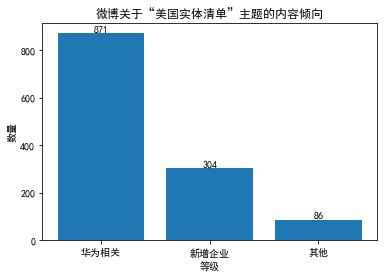

In [25]:
#绘制直方图
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# 这两行代码解决 plt 中文显示的问题
mpl.rcParams["font.sans-serif"] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False

x = np.arange(3)
y = np.array([len(list0),len(list1),len(list2)])
fig, ax = plt.subplots()

bar_width = 0.5
tick_label = ["华为相关","新增企业","其他"]
b = ax.bar(x, y)
#显示数值
for a, b in zip(x, y):
    ax.text(a, b+1, b, ha='center', va='bottom')
    
plt.xticks(x, tick_label)
# 添加x轴和y轴标签
plt.xlabel('等级')
plt.ylabel('数量')
# 添加标题
plt.title('微博关于“美国实体清单”主题的内容倾向')
plt.show()

### 保存成txt

In [20]:
#保存成txt
res0 = list0[1].tolist()
text_save('D:/NLP-master/fenji/0-'+str(len(res0))+'.txt', res0)
res1 = list1[1].tolist()
text_save('D:/NLP-master/fenji/1-'+str(len(res1))+'.txt', res1)
res2 = list2[1].tolist()
text_save('D:/NLP-master/fenji/2-'+str(len(res2))+'.txt', res2)

保存文件成功
保存文件成功
保存文件成功
